# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the Excel File

In [2]:
df = pd.read_csv('Spotify_Youtube.csv', encoding = 'unicode_escape')

# Getting a basic information about the file and data present in it

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20718 non-null  int64  
 1   Artist            20718 non-null  object 
 2   Url_spotify       20718 non-null  object 
 3   Track             20718 non-null  object 
 4   Album             20718 non-null  object 
 5   Album_type        20718 non-null  object 
 6   Uri               20718 non-null  object 
 7   Danceability      20716 non-null  float64
 8   Energy            20716 non-null  float64
 9   Key               20716 non-null  float64
 10  Loudness          20716 non-null  float64
 11  Speechiness       20716 non-null  float64
 12  Acousticness      20716 non-null  float64
 13  Instrumentalness  20716 non-null  float64
 14  Liveness          20716 non-null  float64
 15  Valence           20716 non-null  float64
 16  Tempo             20716 non-null  float6

# Removing the columns which hold the least relevancy.

In [4]:
df.drop(['Description', 'Unnamed: 0'], axis = 1, inplace=True)

# Verifying the changes made

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            20718 non-null  object 
 1   Url_spotify       20718 non-null  object 
 2   Track             20718 non-null  object 
 3   Album             20718 non-null  object 
 4   Album_type        20718 non-null  object 
 5   Uri               20718 non-null  object 
 6   Danceability      20716 non-null  float64
 7   Energy            20716 non-null  float64
 8   Key               20716 non-null  float64
 9   Loudness          20716 non-null  float64
 10  Speechiness       20716 non-null  float64
 11  Acousticness      20716 non-null  float64
 12  Instrumentalness  20716 non-null  float64
 13  Liveness          20716 non-null  float64
 14  Valence           20716 non-null  float64
 15  Tempo             20716 non-null  float64
 16  Duration_ms       20716 non-null  float6

# Extracting the numbr of empty values,using the sum method

In [7]:
pd.isnull(df).sum()

Artist                0
Url_spotify           0
Track                 0
Album                 0
Album_type            0
Uri                   0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Url_youtube         470
Title               470
Channel             470
Views               470
Likes               541
Comments            569
Licensed            470
official_video      470
Stream              576
dtype: int64

# Eliminating the inconsistencies and Verifying again

In [8]:
df.dropna(inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19549 entries, 0 to 20717
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            19549 non-null  object 
 1   Url_spotify       19549 non-null  object 
 2   Track             19549 non-null  object 
 3   Album             19549 non-null  object 
 4   Album_type        19549 non-null  object 
 5   Uri               19549 non-null  object 
 6   Danceability      19549 non-null  float64
 7   Energy            19549 non-null  float64
 8   Key               19549 non-null  float64
 9   Loudness          19549 non-null  float64
 10  Speechiness       19549 non-null  float64
 11  Acousticness      19549 non-null  float64
 12  Instrumentalness  19549 non-null  float64
 13  Liveness          19549 non-null  float64
 14  Valence           19549 non-null  float64
 15  Tempo             19549 non-null  float64
 16  Duration_ms       19549 non-null  float6

# Exploratory Data Analysis

In [ ]:
# Extracting the Most liked songs, by grouping up the 'Track' column and sorting it against 'Likes', in descending order.

<Axes: xlabel='Track', ylabel='Likes'>

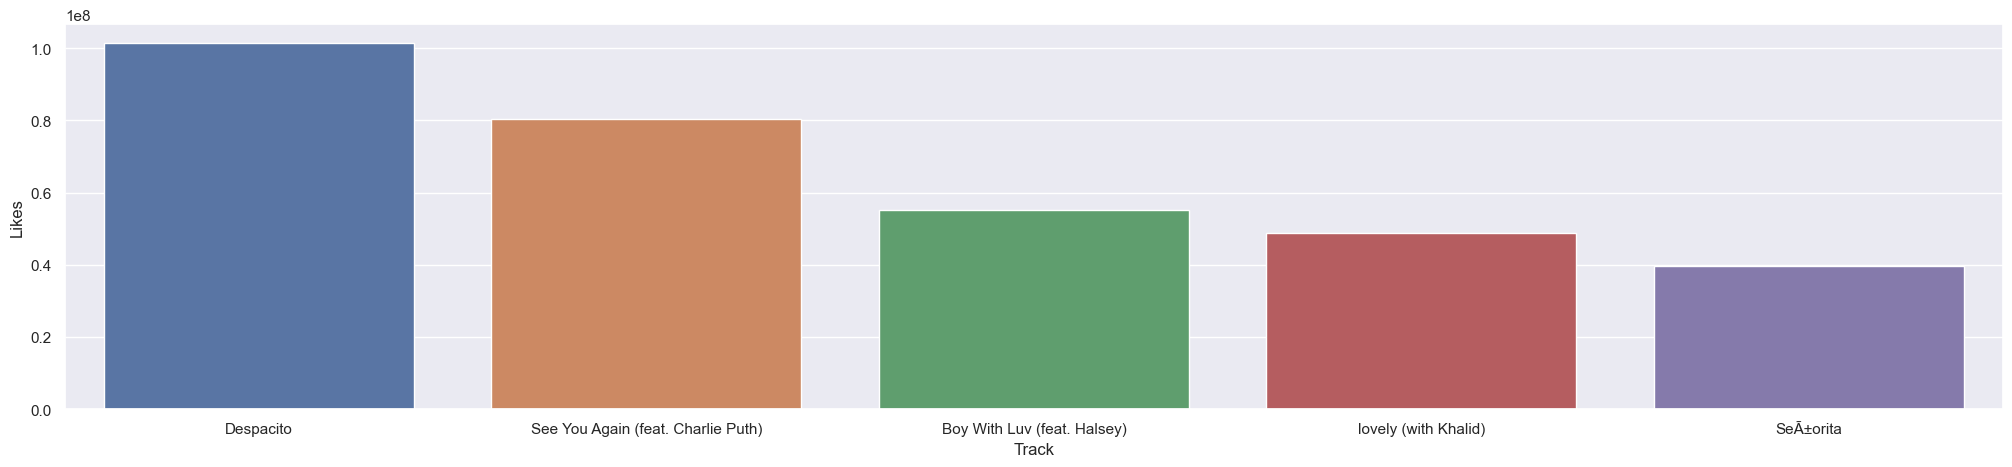

In [20]:
Likes_bar = df.groupby(['Track'], as_index=False)['Likes'].sum().sort_values(by='Likes', ascending=False).head(5)
sns.set(rc={'figure.figsize':(25,5)})
sns.barplot(x = 'Track', y = 'Likes', data = Likes_bar)

In [ ]:
#Extracting the Tracks which were streamed the maximum times.

[Text(0, 0, '5.46536e+09'),
 Text(0, 0, '5.22563e+09'),
 Text(0, 0, '5.07666e+09'),
 Text(0, 0, '4.75762e+09'),
 Text(0, 0, '4.73156e+09')]

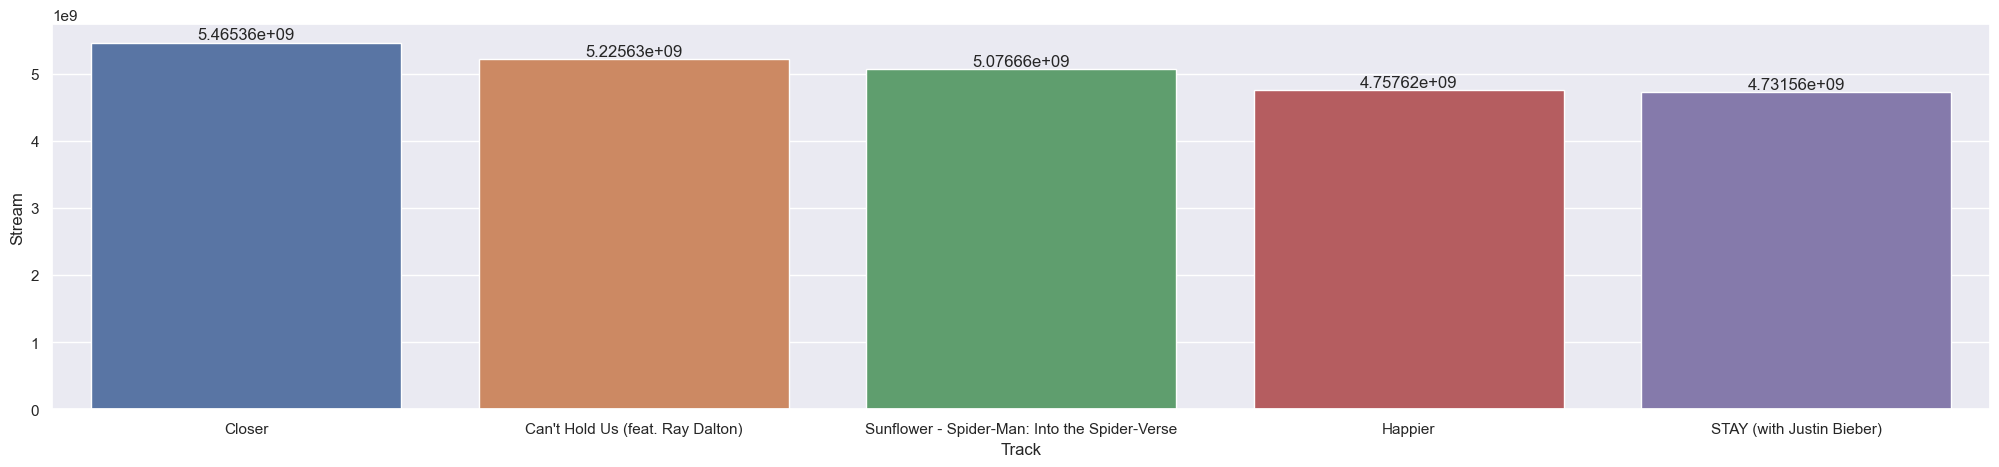

In [59]:
Stream_bar = df.groupby(['Track'], as_index=False)['Stream'].sum().sort_values(by='Stream', ascending=False).head(5)
sns.set(rc={'figure.figsize':(25,5)})
ax = sns.barplot(x = 'Track', y = 'Stream', data = Stream_bar)
ax.bar_label(ax.containers[0])

In [ ]:
#Determining the number of licensed and unlicensed songs

[Text(0, 0, '1.61593e+10'),
 Text(0, 0, '1.15476e+10'),
 Text(0, 0, '9.9745e+09'),
 Text(0, 0, '5.9084e+09'),
 Text(0, 0, '5.32201e+09')]

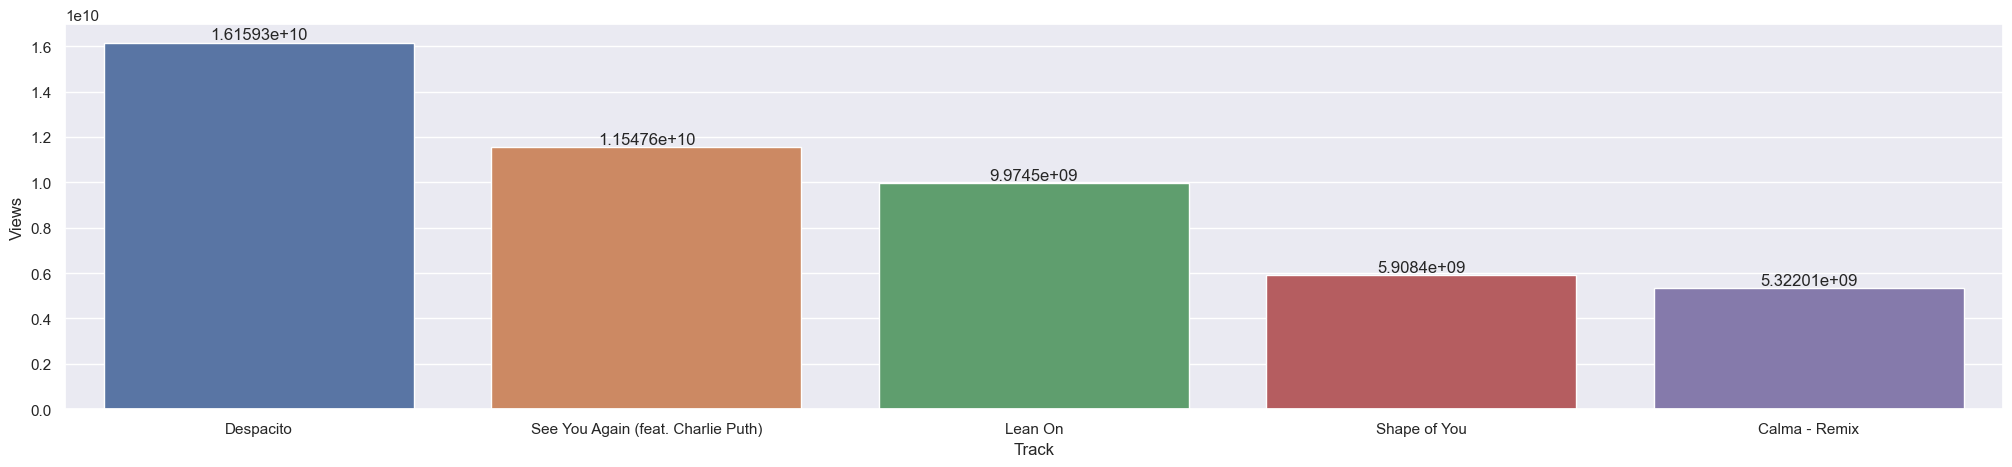

In [23]:
tcms = df.groupby(['Track'], as_index=False)['Views'].sum().sort_values(by='Views', ascending=False).head(5)
sns.set(rc={'figure.figsize':(25,5)})
ax = sns.barplot(x = 'Track', y = 'Views', data = tcms)
ax.bar_label(ax.containers[0])

[Text(0, 0, '1.61381e+07'),
 Text(0, 0, '1.30714e+07'),
 Text(0, 0, '9.13176e+06'),
 Text(0, 0, '8.50558e+06'),
 Text(0, 0, '5.33154e+06')]

C:\Users\Rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 149 (\x95) missing from current font.
  func(*args, **kwargs)
C:\Users\Rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 130 (\x82) missing from current font.
  func(*args, **kwargs)
C:\Users\Rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 138 (\x8a) missing from current font.
  func(*args, **kwargs)
C:\Users\Rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 131 (\x83) missing from current font.
  func(*args, **kwargs)
C:\Users\Rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 128 (\x80) missing from current font.
  func(*args, **kwargs)
C:\Users\Rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py

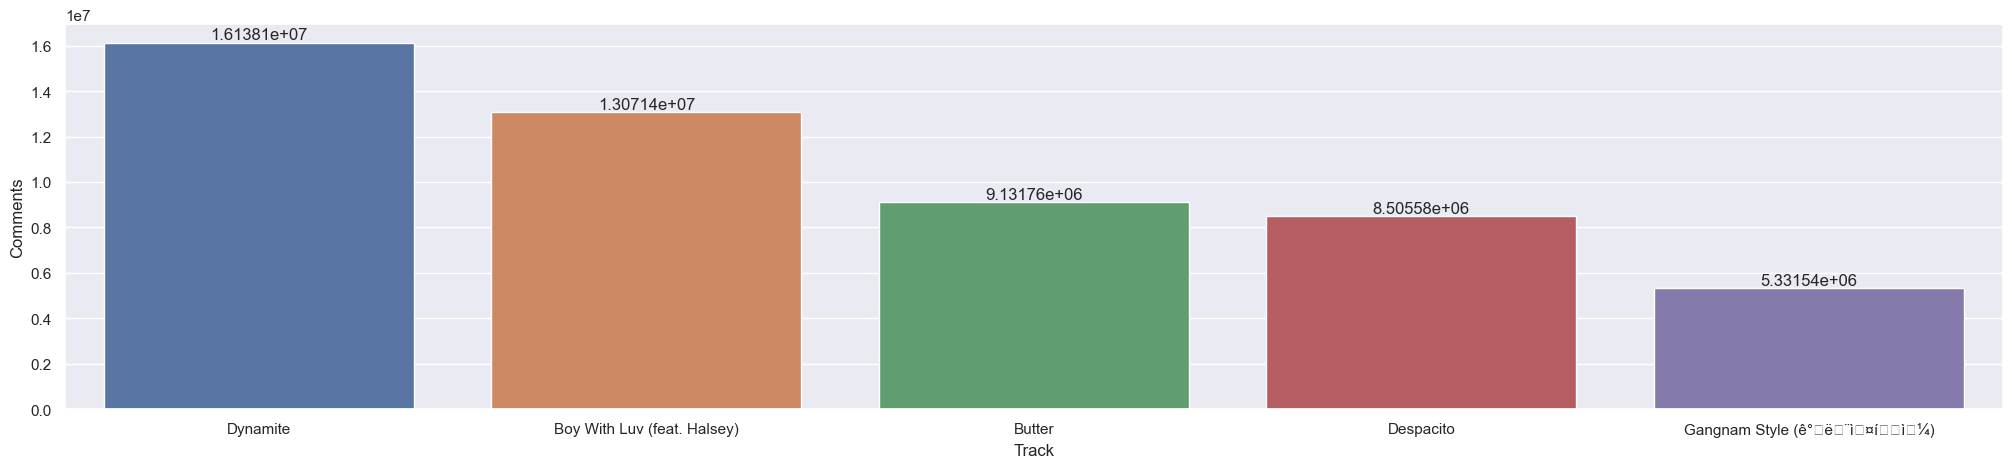

In [34]:
tcms = df.groupby(['Track'], as_index=False)['Comments'].sum().sort_values(by='Comments', ascending=False).head(5)
sns.set(rc={'figure.figsize':(25,5)})
ax = sns.barplot(x = 'Track', y ='Comments', data = tcms)
ax.bar_label(ax.containers[0])

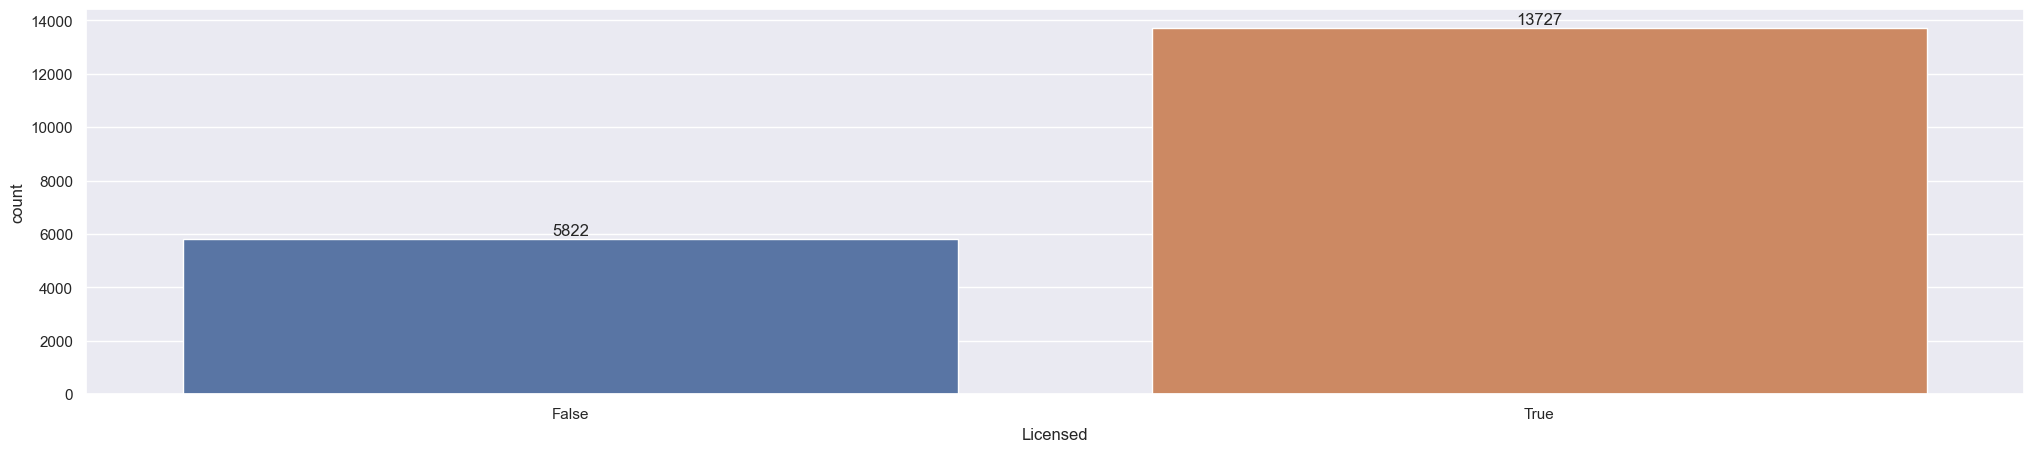

In [28]:
lc = sns.countplot(x = 'Licensed', data = df)
for bars in lc.containers:
    lc.bar_label(bars)

In [ ]:
#Were licensed songs streamed the most or unlicensed songs streamed the most.

[Text(0, 0, '5.67413e+11'), Text(0, 0, '2.11295e+12')]

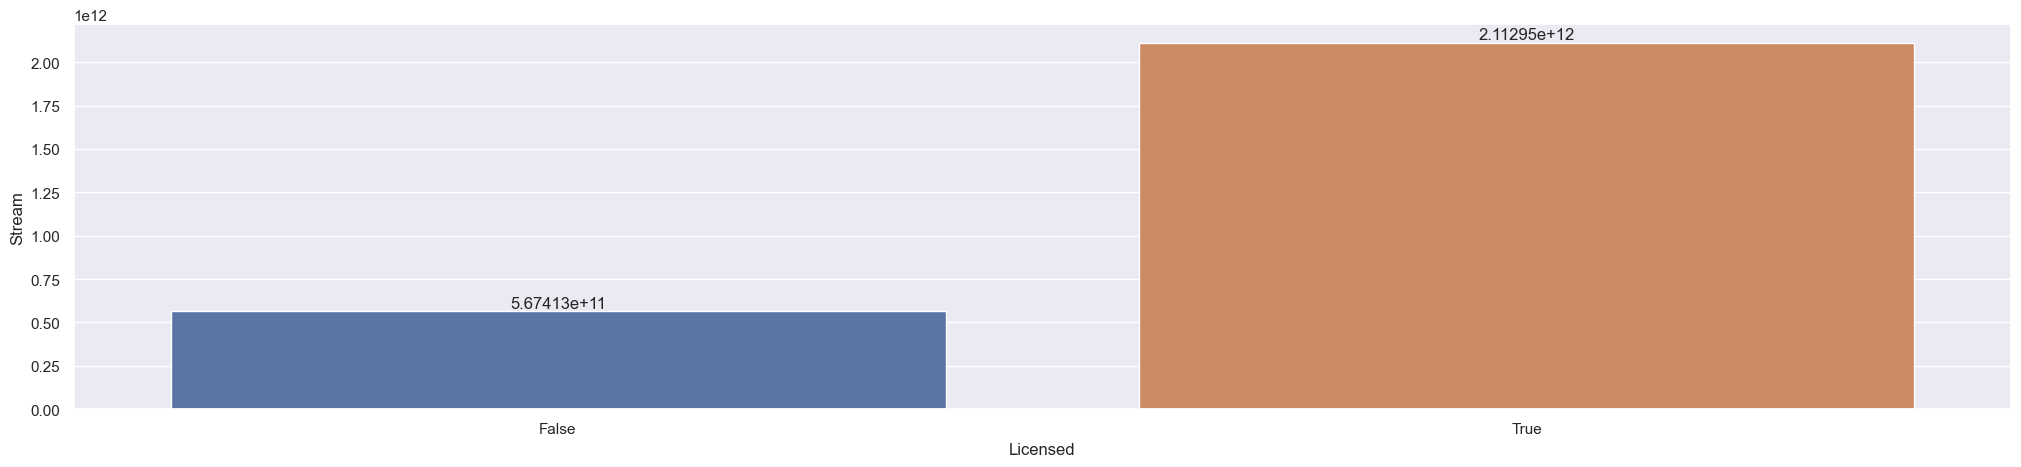

In [58]:
LICSTR_bar = df.groupby(['Licensed'], as_index=False)['Stream'].sum().sort_values(by='Stream', ascending=False).head(5)
sns.set(rc={'figure.figsize':(25,5)})
ax = sns.barplot(x = 'Licensed', y = 'Stream', data = LICSTR_bar)
ax.bar_label(ax.containers[0])

In [ ]:
#Artist with the most number of likes

[Text(0, 0, '1.39404e+08'),
 Text(0, 0, '1.32303e+08'),
 Text(0, 0, '8.63369e+07'),
 Text(0, 0, '8.35433e+07'),
 Text(0, 0, '7.85843e+07')]

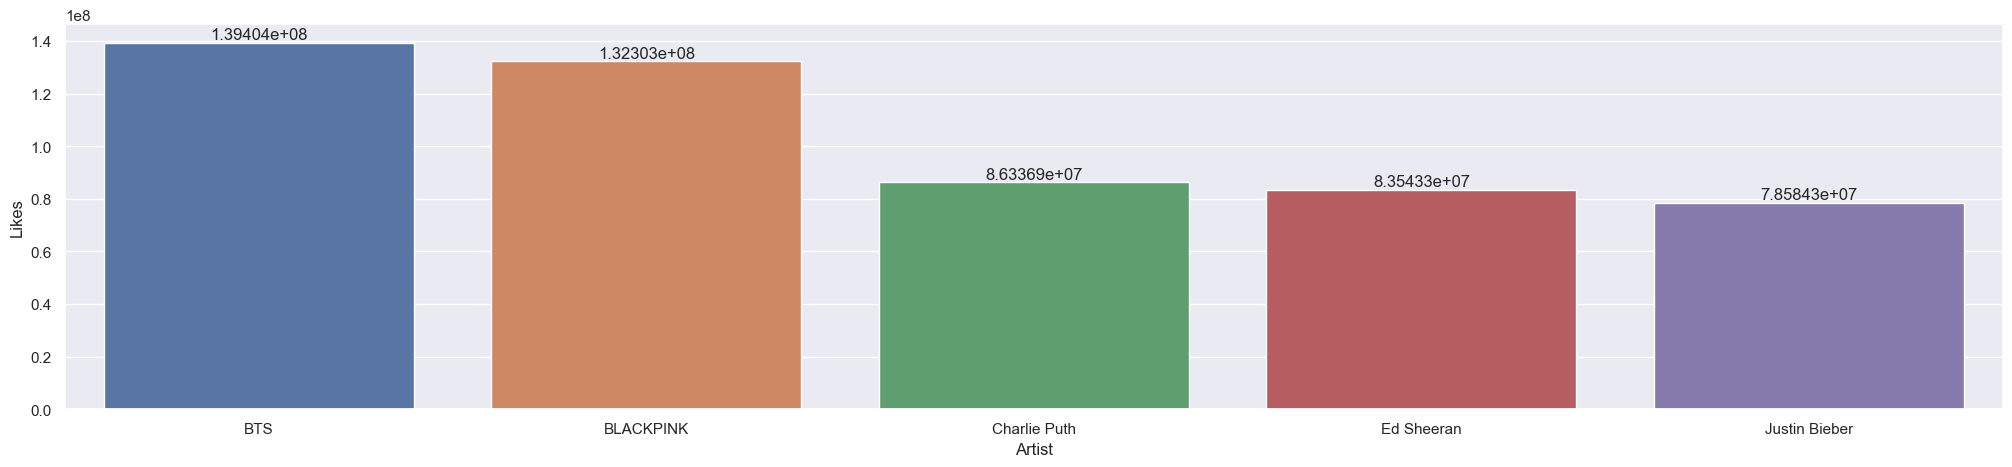

In [56]:
AL_bar = df.groupby(['Artist'], as_index=False)['Likes'].sum().sort_values(by='Likes', ascending=False).head(5)
sns.set(rc={'figure.figsize':(25,5)})
ax = sns.barplot(x = 'Artist', y = 'Likes', data = AL_bar)
ax.bar_label(ax.containers[0])


In [ ]:
#Artist which were streamed the most

[Text(0, 0, '1.52513e+10'),
 Text(0, 0, '1.43949e+10'),
 Text(0, 0, '1.34081e+10'),
 Text(0, 0, '1.24643e+10'),
 Text(0, 0, '1.20978e+10')]

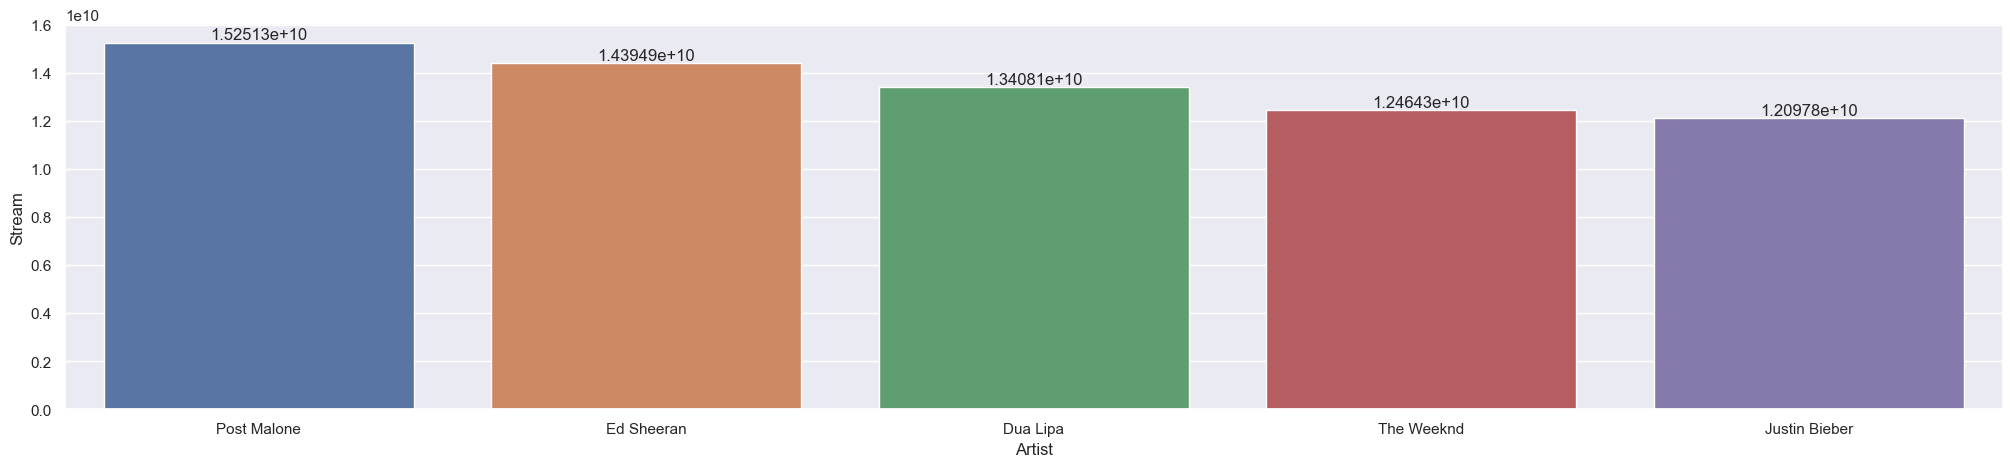

In [55]:
As_bar = df.groupby(['Artist'], as_index=False)['Stream'].sum().sort_values(by='Stream', ascending=False).head(5)
sns.set(rc={'figure.figsize':(25,5)})
ax = sns.barplot(x = 'Artist', y = 'Stream', data = As_bar)
ax.bar_label(ax.containers[0])

In [ ]:
#The Albums which were streamed the most

[Text(0, 0, '1.54602e+10'),
 Text(0, 0, '1.46017e+10'),
 Text(0, 0, '1.31206e+10'),
 Text(0, 0, '1.21676e+10'),
 Text(0, 0, '1.16281e+10')]

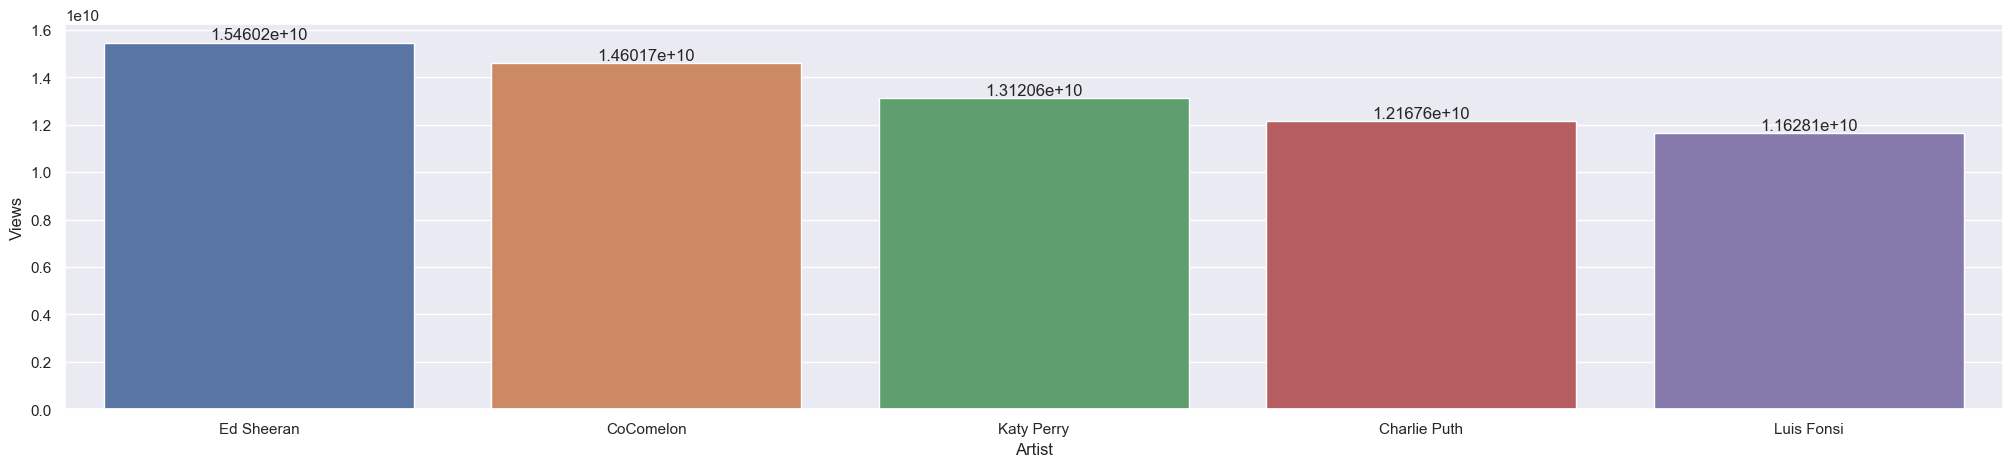

In [27]:
avs = df.groupby(['Artist'], as_index=False)['Views'].sum().sort_values(by='Views', ascending=False).head(5)
sns.set(rc={'figure.figsize':(25,5)})
ax = sns.barplot(x = 'Artist', y = 'Views', data = avs)
ax.bar_label(ax.containers[0])


[Text(0, 0, '9.71279e+09'),
 Text(0, 0, '9.49289e+09'),
 Text(0, 0, '8.46368e+09'),
 Text(0, 0, '8.32536e+09'),
 Text(0, 0, '7.37989e+09')]

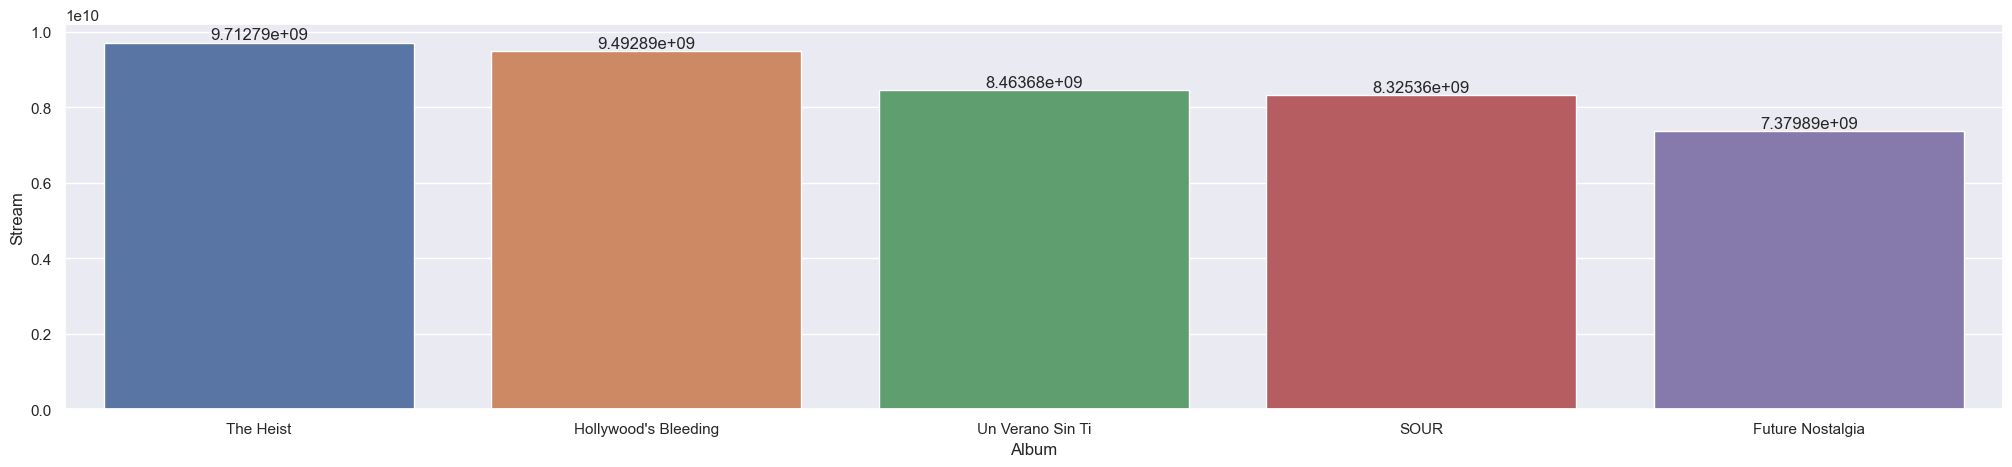

In [52]:
As_bar = df.groupby(['Album'], as_index=False)['Stream'].sum().sort_values(by='Stream', ascending=False).head(5)
sns.set(rc={'figure.figsize':(25,5)})
ax = sns.barplot(x = 'Album', y = 'Stream', data = As_bar)
ax.bar_label(ax.containers[0])

In [ ]:
#What were the types of album, that had audience engaged in the songs ?

[Text(0, 0, '2.18338e+12'),
 Text(0, 0, '4.93103e+11'),
 Text(0, 0, '6.16618e+10')]

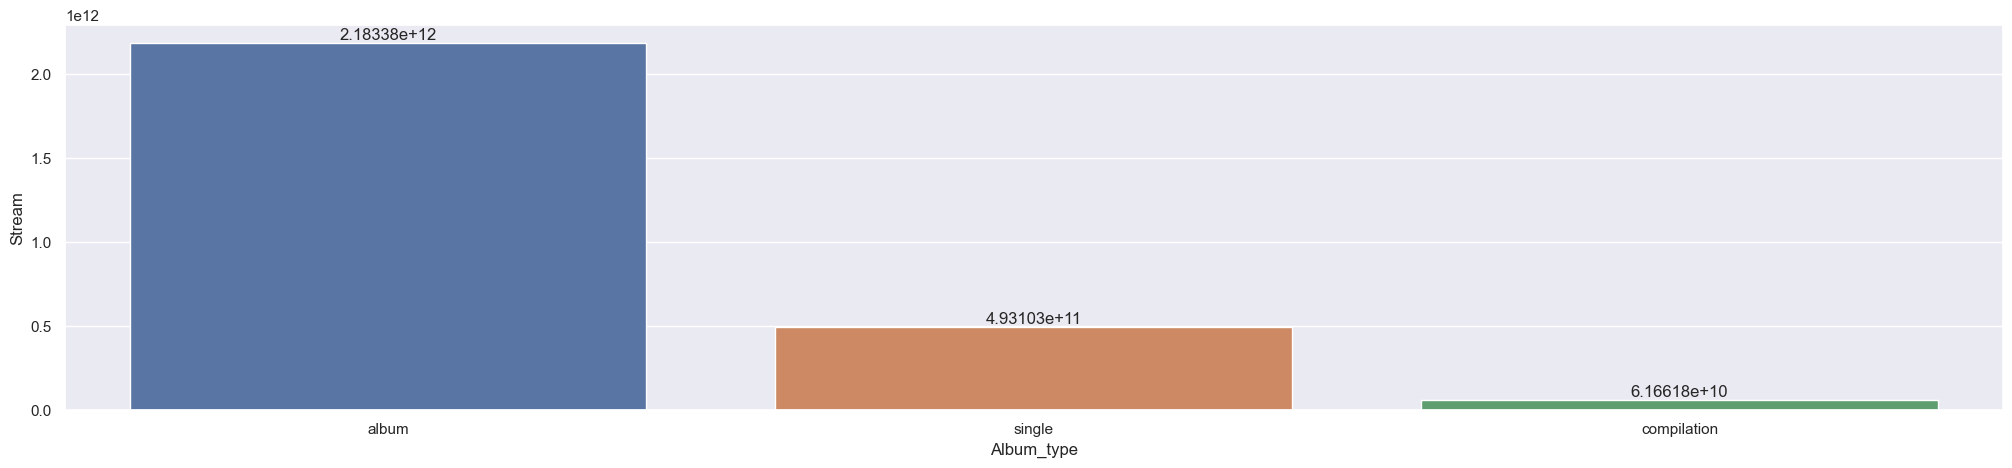

In [26]:
Ats_bar = df.groupby(['Album_type'], as_index=False)['Stream'].sum().sort_values(by='Stream', ascending=False).head(5)
sns.set(rc={'figure.figsize':(25,5)})
ax = sns.barplot(x = 'Album_type', y = 'Stream', data = Ats_bar)
ax.bar_label(ax.containers[0])